In [8]:
#Stacking for Classification
#In this section, we will look at using stacking for a classification problem.
#First, we can use the make_classification() function to create a synthetic binary classification problem with 1,000 examples and 20 input features.
#The complete example is listed below.
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [12]:
df = pd.read_csv('bank-full.csv', sep=';')

In [13]:
# In this cell i change data categorical with numeric 
d = {"admin.":0,"unknown":1,"unemployed":2,"management":3,"housemaid":4,"entrepreneur":5,"student":6,
                                       "blue-collar":7,"self-employed":8,"retired":9,"technician":10,"services":11}
df['job'] = df['job'].map(d)
d = {"married":0,"divorced":1,"single":2}
df['marital'] = df['marital'].map(d)
d = {"secondary":0,"primary":1,"tertiary":2}
df['education'] = df['education'].map(d)
d = {"yes":0,"no":1}
df['default'] = df['default'].map(d)
d = {"yes":0,"no":1}
df['housing'] = df['housing'].map(d)
d = {"yes":0,"no":1}
df['loan'] = df['loan'].map(d)
d = {"telephone":0,"cellular":1}
df['contact'] = df['contact'].map(d)
d = {"jan":0, "feb":1, "mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11}
df['month'] = df['month'].map(d)
d = {"other":0,"failure":1,"success":2}
df['poutcome'] = df['poutcome'].map(d)
d = {"yes":0,"no":1}
df['y'] = df['y'].map(d)

In [15]:
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['contact'] = df['contact'].fillna(df['contact'].mode()[0])
df['poutcome'] = df['poutcome'].fillna(df['poutcome'].mode()[0])

In [16]:
atribut = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact','day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
label = ['y']
X = df[atribut]
y = df[label]

In [4]:
# test classification dataset

def get_dataset():
    # X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    X, y = 
    return X, y

In [17]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [18]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.886 (0.002)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>knn 0.882 (0.004)
>cart 0.872 (0.005)
>svm 0.883 (0.001)
>bayes 0.861 (0.005)


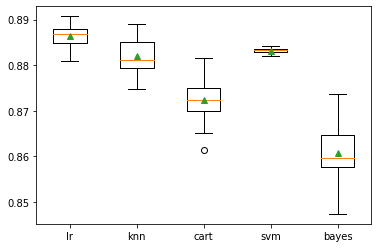

In [19]:
# define dataset
# X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [20]:
#STACKING
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [21]:
def get_modelstacking():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.828 (0.045)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.021)


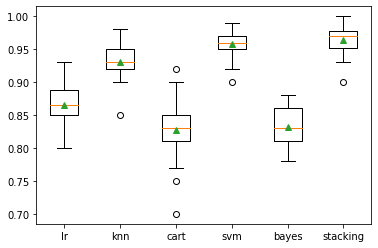

In [22]:
from sklearn.ensemble import StackingClassifier

# evaluate a give model using cross-validation
def evaluate_model_stacking(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_modelstacking()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_stacking(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()